<a href="https://colab.research.google.com/github/UVDivyaSree/Online-Book-Recommendation-System/blob/main/mini_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#seaborn is python  data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative
#statistical graphics
import seaborn as sns

In [ ]:
#Loading the dataset

df = pd.read_csv('books.csv', error_bad_lines=False)

# Lines with too many fields (e.g. a csv line with too many commas) will by default cause an exception to be raised,
# and no DataFrame will be returned. If False, then these “bad lines” will dropped from the DataFrame that is returned


b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [ ]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [ ]:
df.isnull().sum()
#to check if there are any null values in any column of the dataset

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [ ]:
df.describe()
#will give us statistical information about the dataset

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [ ]:
df.average_rating=df.average_rating.astype(float)

print(df.average_rating.dtype)

#removed the rows that had text data for average_rating column and converted the datatype from object to float

float64


[Text(0.5, 1.0, 'Top 10 books with highest rating')]

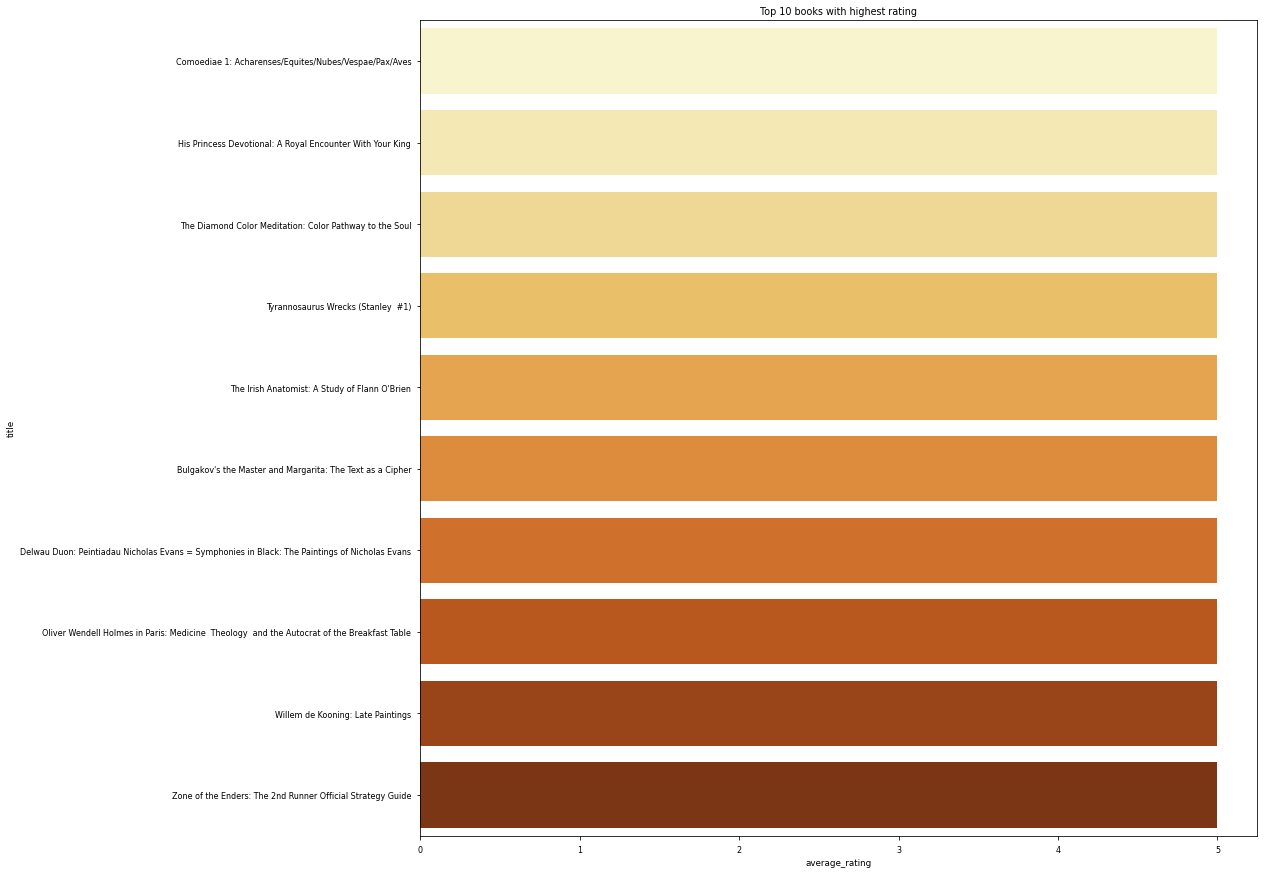

In [ ]:
#getting the books that have the highest average rating given to them
top_ten_highest_rating = df.sort_values(by='average_rating', ascending=False).head(10)
plt.style.use('seaborn-paper')
fig = plt.figure(figsize = (15, 15)) #for creating the graph and adjusting its size
#  sns.set(font_scale = 3) #for adjusting the font size of the axes label
sns.barplot(x="average_rating", y="title", data=top_ten_highest_rating , palette='YlOrBr').set(title='Top 10 books with highest rating')


[Text(0.5, 1.0, 'Top 10 books with highest number of ratings')]

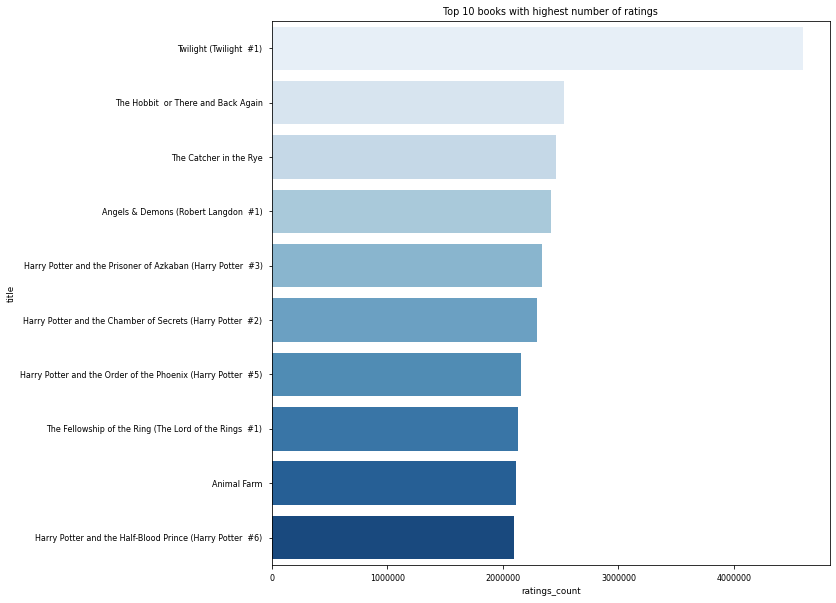

In [ ]:
#getting the books that have the highest number of ratings

top_ten_highest_num_rating = df.sort_values(by='ratings_count', ascending=False).head(10)
plt.style.use('seaborn-paper')
fig, ax = plt.subplots(figsize = (10, 10))
#  sns.set(font_scale = 3)
ax.ticklabel_format(style='plain')
sns.barplot(x="ratings_count", y="title", data=top_ten_highest_num_rating , palette='Blues').set(title='Top 10 books with highest number of ratings')



[Text(0.5, 1.0, 'Top 10 books in terms of average rating and number of ratings')]

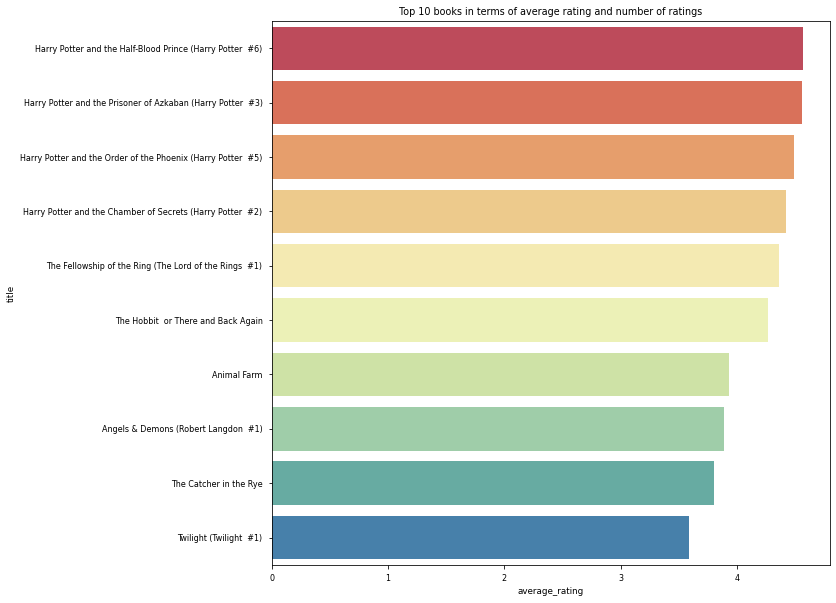

In [ ]:
#getting the books that have the highest average rating and number of ratings
top_ten=df[df['ratings_count']>1000000]
top_ten=top_ten.sort_values(by='ratings_count', ascending=False).head(10)
top_ten_rating=top_ten.sort_values(by='average_rating', ascending=False)
plt.style.use('seaborn-paper')
plt.figure(figsize=(10,10))
#  sns.set(font_scale = 3)
sns.barplot(x="average_rating", y="title", data=top_ten_rating, palette='Spectral').set(title='Top 10 books in terms of average rating and number of ratings')

In [ ]:
# to know the top 10 authors who have written the most number of books
ba1= df.groupby('authors')
print(ba1.first())
# print(ba1.first()['title'])
print(ba1.first()['title'].count())

book_authors = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('authors')
book_authors
# print(type(book_authors))

                                                    bookID  \
authors                                                      
A.B. Yehoshua/Hillel Halkin                          27503   
A.D.P. Briggs/Leo Tolstoy/Fyodor Dostoyevsky         17883   
A.E. Cunningham/Harlan Ellison/Charles F. Mille...   40880   
A.J. Jacobs                                          28116   
A.M. Homes                                           29412   
...                                                    ...   
Émile Zola/Henri Mitterand                           28417   
Émile Zola/Robert Lethbridge/Elinor Dorday           28419   
Émile Zola/Robin Buss/Brian  Nelson                  28413   
Émile Zola/Roger Pearson                             28407   
Éric-Emmanuel Schmitt                                 4314   

                                                                                                title  \
authors                                                                                 

,title
authors,
Stephen King,40
P.G. Wodehouse,40
Rumiko Takahashi,39
Orson Scott Card,35
Agatha Christie,33
Piers Anthony,30
Mercedes Lackey,29
Sandra Brown,29
Dick Francis,28


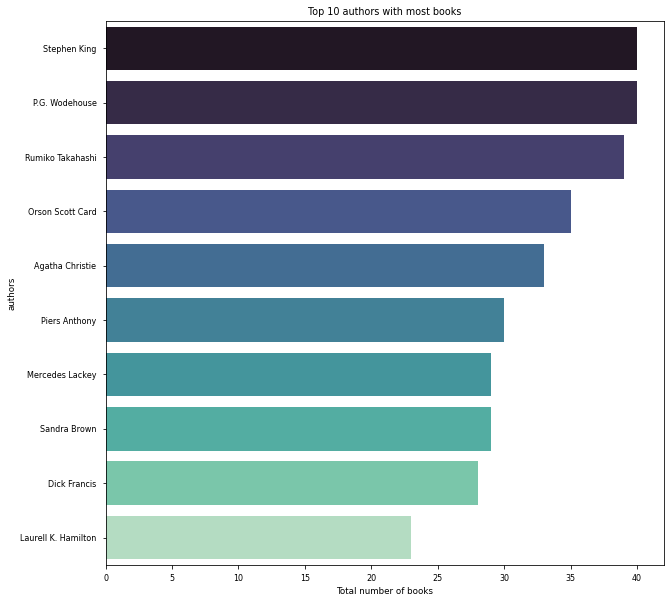

In [ ]:
# plotting a graph for the top 10 authors who have written the most number of books

plt.figure(figsize=(10,10))
ax=sns.barplot(x = book_authors['title'], y = book_authors.index, data = book_authors, palette="mako")
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
plt.show()

In [ ]:
# to know the top 10 authors that have written highest rated books

highest_rating_book_authors = df.groupby('authors')['average_rating'].mean().reset_index().sort_values('average_rating', ascending = False).head(10).set_index('authors')
highest_rating_book_authors

,average_rating
authors,
Keith Donohue,5.0
John Diamond,5.0
R. McL. Wilson,5.0
Nicholas Evans/Rhonda Evans,5.0
James E. Campbell,5.0
Aristophanes/F.W. Hall/W.M. Geldart,5.0
Chris Green/Chris Wright/Paul Douglas Gardner,5.0
Sheri Rose Shepherd,5.0
Laura Driscoll/Alisa Klayman-Grodsky/Eric Weiner,5.0


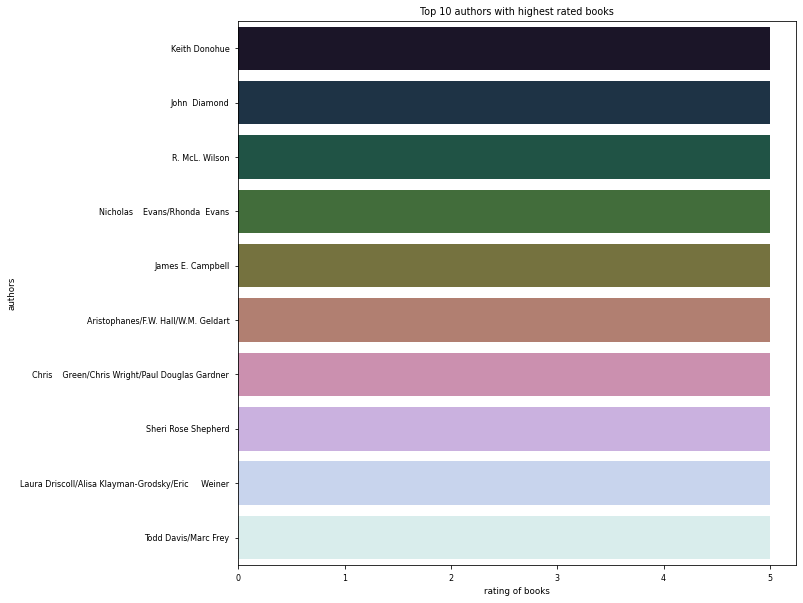

In [ ]:
# to plot a graph for the top 10 authors that have written highest rated books

plt.figure(figsize=(10,10))
ax=sns.barplot(x = highest_rating_book_authors['average_rating'], y = highest_rating_book_authors.index, data = highest_rating_book_authors, palette="cubehelix")
ax.set_title("Top 10 authors with highest rated books")
ax.set_xlabel("rating of books")
plt.show()

In [ ]:
#df.loc[df['authors'].isin(['Stephen King', 'P.G. Wodehouse', 'Rumiko Takahashi', 'Orson Scott Card', 'Agatha Christie', 'Piers Anthony', 'Mercedes Lackey', 'Sandra Brown', 'Dick Francis', 'Laurell K. Hamilton'])

most_books_authors=df.loc[df['authors'].isin(book_authors.index)]
# most_books_authors.authors.unique()
most_books_authors

best_authors = most_books_authors.groupby('authors')['average_rating'].mean().reset_index().sort_values('average_rating', ascending = False).head(10).set_index('authors')
best_authors

# these are the best authors since they have written quite a few books and the average rating given to all those books is also good


,average_rating
authors,
Rumiko Takahashi,4.186667
P.G. Wodehouse,4.147250
Mercedes Lackey,4.039310
Agatha Christie,3.989091
Laurell K. Hamilton,3.988696
Stephen King,3.973500
Dick Francis,3.962143
Orson Scott Card,3.779143
Sandra Brown,3.742069


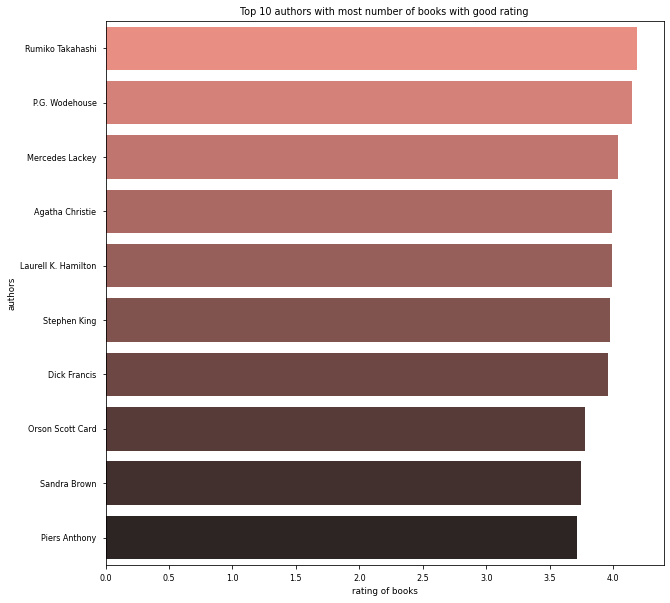

In [ ]:
plt.figure(figsize=(10,10))
ax=sns.barplot(x = best_authors['average_rating'], y = best_authors.index, data = best_authors, palette="dark:salmon_r")
ax.set_title("Top 10 authors with most number of books with good rating")
ax.set_xlabel("rating of books")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'average rating')

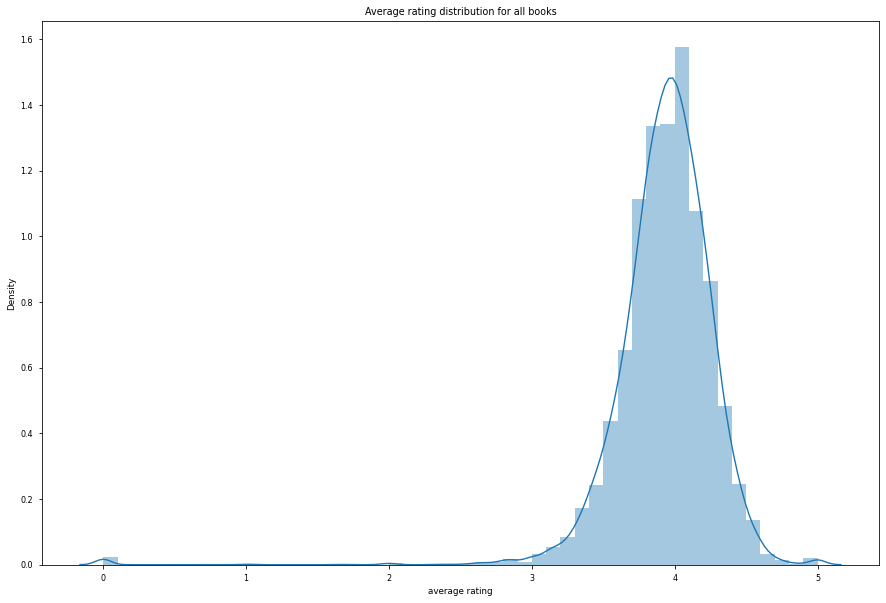

In [ ]:
fig, ax= plt.subplots(figsize=[15,10])

sns.distplot(df['average_rating'])
ax.set_title('Average rating distribution for all books')
ax.set_xlabel('average rating')

#distplot allows you to plot a histogram with a line through it.

<Figure size 1440x1440 with 0 Axes>

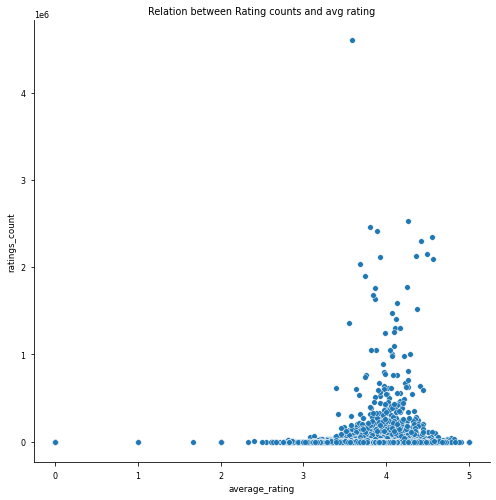

In [ ]:
plt.figure(figsize=(20,20))
ax=sns.relplot(data=df, x="average_rating", y="ratings_count",sizes=(400,200), height=7)
plt.title('Relation between Rating counts and avg rating')
ax.set_axis_labels("average_rating", "ratings_count")

#giving the relationship between the number of ratings given to book and the average rating of book

In [ ]:
# pd.unique(df['authors'])

df2 = df.copy() #creating a copy of the dataframe df

df2.loc[(df2['average_rating']>=0)&(df2['average_rating']<=1),'rating between']="between 0 and 1" #getting values which are present between 0 and 1
df2.loc[(df2['average_rating']>=1)&(df2['average_rating']<=2), 'rating between']="between 1 and 2"
df2.loc[(df2['average_rating']>=2)&(df2['average_rating']<=3), 'rating between']="between 2 and 3"
df2.loc[(df2['average_rating']>=3)&(df2['average_rating']<=4), 'rating between']="between 3 and 4"
df2.loc[(df2['average_rating']>=4)&(df2['average_rating']<=5), 'rating between']="between 4 and 5"

df2.sort_values('average_rating')

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating between
2533,9338,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,0.0,1932206086,9781932206081,eng,304,0,0,1/1/2003,Frederick P. Lenz Foundation for American Budd...,between 0 and 1
9437,37467,Classroom Interactions as Cross-Cultural Encou...,Jasmine C.M. Luk/Angel M.Y. Lin,0.0,0805850848,9780805850840,eng,241,0,0,8/5/2006,Routledge,between 0 and 1
2532,9337,How To Meditate: An Anthology Of Talks On Medi...,Frederick P. Lenz,0.0,1932206108,9781932206104,eng,228,0,0,1/1/2004,Frederick P. Lenz Foundation for American Budd...,between 0 and 1
375,1302,Juiced Official Strategy Guide,Doug Walsh,0.0,0744005612,9780744005615,eng,112,0,0,6/1/2005,BradyGames,between 0 and 1
265,799,Out to Eat London 2002 (Lonely Planet Out to Eat),Lonely Planet/Mark Honan,0.0,1740592050,9781740592055,eng,295,0,0,9/1/2001,Lonely Planet,between 0 and 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5648,20957,Colossians and Philemon: A Critical and Exeget...,R. McL. Wilson,5.0,0567044718,9780567044716,eng,512,1,0,12/7/2005,T&T Clark Int'l,between 4 and 5
6184,23276,Taxation of Mineral Rents,Ross Garnaut,5.0,0198284543,9780198284543,eng,350,1,0,11/17/1983,Oxford University Press USA,between 4 and 5
5023,18184,The Complete Theory Fun Factory: Music Theory ...,Ian Martin/Katie Elliott,5.0,0851621813,9780851621814,eng,96,1,0,6/1/2004,Boosey & Hawkes Inc,between 4 and 5
4933,17830,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,5.0,0533017424,9780533017423,eng,202,4,0,1/1/1975,Vantage Press,between 4 and 5


In [ ]:
rating_df=pd.get_dummies(df2['rating between'])
rating_df

#converting the values of the 'rating between' column into numerical data so that we can give it to the model
# pandas.get_dummies() function will convert categorical data into numbers

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
11118,0,0,0,0,1
11119,0,0,0,0,1
11120,0,0,0,1,0
11121,0,0,0,1,0


In [ ]:
language_df = pd.get_dummies(df2['language_code'])
language_df

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11119,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11120,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11121,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
author_df = pd.get_dummies(df2['authors'])
author_df

,A.B. Yehoshua/Hillel Halkin,A.D.P. Briggs/Leo Tolstoy/Fyodor Dostoyevsky,A.E. Cunningham/Harlan Ellison/Charles F. Miller/Terry Dowling/Paul Rhoads/Jack Vance/Tom Shippey/Gene Wolfe/David Langford/Dan Simmons/David Mathew,A.J. Jacobs,A.M. Homes,A.N. Roquelaure/Anne Rice,A.S. Byatt,Abbie Hoffman/Anita Hoffman,Abdul Rahman Munif/Peter Theroux,Abigail Adams/Frank Shuffelton,...,Åsne Seierstad/Ingrid Christopherson,Émile Zola/Andrew Moore/Ernest Alfred Vizetelly,Émile Zola/Douglas Parmée,Émile Zola/Ernest Alfred Vizetelly,Émile Zola/Ernest Alfred Vizetelly/Henry Vizetelly,Émile Zola/Henri Mitterand,Émile Zola/Robert Lethbridge/Elinor Dorday,Émile Zola/Robin Buss/Brian Nelson,Émile Zola/Roger Pearson,Éric-Emmanuel Schmitt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataset_model=pd.concat([rating_df, language_df, author_df, df2['average_rating'], df2['ratings_count']], axis=1)
dataset_model

#dataset_model is the dataset that will be given to the machine learning model
#it has been prepared so that the machine learning model can use it.

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,ale,ara,en-CA,en-GB,en-US,...,Émile Zola/Douglas Parmée,Émile Zola/Ernest Alfred Vizetelly,Émile Zola/Ernest Alfred Vizetelly/Henry Vizetelly,Émile Zola/Henri Mitterand,Émile Zola/Robert Lethbridge/Elinor Dorday,Émile Zola/Robin Buss/Brian Nelson,Émile Zola/Roger Pearson,Éric-Emmanuel Schmitt,average_rating,ratings_count
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.57,2095690
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.49,2153167
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.42,6333
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.56,2339585
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.78,41428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.06,156
11119,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.08,783
11120,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.96,820
11121,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.72,769


In [ ]:
dataset_model1=pd.concat([rating_df, language_df, author_df, df2['average_rating']], axis=1)
dataset_model1

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,ale,ara,en-CA,en-GB,en-US,...,Émile Zola/Andrew Moore/Ernest Alfred Vizetelly,Émile Zola/Douglas Parmée,Émile Zola/Ernest Alfred Vizetelly,Émile Zola/Ernest Alfred Vizetelly/Henry Vizetelly,Émile Zola/Henri Mitterand,Émile Zola/Robert Lethbridge/Elinor Dorday,Émile Zola/Robin Buss/Brian Nelson,Émile Zola/Roger Pearson,Éric-Emmanuel Schmitt,average_rating
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.57
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.49
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.42
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.56
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.06
11119,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.08
11120,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.96
11121,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.72


In [ ]:
# import sklearn as sk
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

dataset_model = minmax.fit_transform(dataset_model)

dataset_model

#sklearn is a very useful python libraray for machine learning. it provides efficient tools for machine learning and statistical modeling
#such as preprocessing, classification, regression etc.

#MinMaxScaler() is used for normalizing the data to fit into a standard range


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.14000000e-01, 4.55816060e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.98000000e-01, 4.68317403e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.84000000e-01, 1.37743803e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.92000000e-01, 1.78351363e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.44000000e-01, 1.67258779e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.82000000e-01, 2.45776879e-05]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

dataset_model1 = minmax.fit_transform(dataset_model1)

dataset_model1

array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.914],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.898],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.884],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.792],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.744],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.782]])

In [ ]:
# from sklearn import neighbors
# model=neighbors.NearestNeighbors(n_neighbors=11, algorithm='ball_tree')
# model.fit(dataset_model1)
# dist1, idlist1=model.kneighbors(dataset_model1)

In [ ]:
from sklearn import neighbors
model=neighbors.NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
model.fit(dataset_model)
dist, idlist=model.kneighbors(dataset_model)

In [ ]:
dist

array([[0.        , 0.02030477, 0.05253323, ..., 1.41746798, 1.41864726,
        1.42037915],
       [0.        , 0.02030477, 0.0336718 , ..., 1.41728108, 1.41752203,
        1.42118248],
       [0.        , 0.00415576, 0.02800861, ..., 1.41421363, 1.41421368,
        1.41421375],
       ...,
       [0.        , 0.048     , 1.41421356, ..., 1.41421356, 1.41421356,
        1.41421356],
       [0.        , 0.048     , 1.41421356, ..., 1.41421356, 1.41421356,
        1.41421356],
       [0.        , 1.41421356, 1.41421356, ..., 1.41421498, 1.41421498,
        1.41421498]])

In [ ]:
idlist

array([[    0,     1,  4415, ...,  7309,  1697,  5270],
       [    1,     0,  4415, ...,  1697,  7309,  5270],
       [    2,   613,  1233, ...,  3101,  3659,  5486],
       ...,
       [11120, 11121,  5459, ..., 10935,  1418,   908],
       [11121, 11120,  1463, ...,  7686,  2908,   436],
       [11122,  6343, 10297, ...,  7351, 11108,  6340]])

In [ ]:
def bookRecom(name):
    book_list=[]
    book_id=df2[df2['title']==name].index
    book_id=book_id[0]
    for new in idlist[book_id]:
        book_list.append(df2.loc[new].title)
    return book_list

Book_name=bookRecom('Harry Potter and the Half-Blood Prince (Harry Potter  #6)')
Book_name[1:]


['Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)',
 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)',
 'Harry Potter Boxed Set  Books 1-5 (Harry Potter  #1-5)',
 "Harry Potter and the Sorcerer's Stone (Harry Potter  #1)",
 'The Fellowship of the Ring (The Lord of the Rings  #1)',
 'The Lightning Thief (Percy Jackson and the Olympians  #1)',
 'The Hobbit  or There and Back Again',
 'The Book Thief']

In [ ]:
 def bookRecom1(name):
     book_list=[]
     book_id=df2[df2['title']==name].index
     book_id=book_id[0]
     for new in idlist[book_id]:
         book_list.append(df2.loc[new].title)
     return book_list

 Book_name=bookRecom1("Harry Potter and the Half-Blood Prince (Harry Potter  #6)")
 Book_name[1:]

['Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)',
 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)',
 'Harry Potter Boxed Set  Books 1-5 (Harry Potter  #1-5)',
 "Harry Potter and the Sorcerer's Stone (Harry Potter  #1)",
 'The Fellowship of the Ring (The Lord of the Rings  #1)',
 'The Lightning Thief (Percy Jackson and the Olympians  #1)',
 'The Hobbit  or There and Back Again',
 'The Book Thief']

In [ ]:
import numpy as np
np.save("idlist.npy", idlist)

In [ ]:
np.save("dist.npy", dist)

In [ ]:
idlist = np.load("idlist.npy")
idlist

array([[    0,     1,  4415, ...,  7309,  1697,  5270],
       [    1,     0,  4415, ...,  1697,  7309,  5270],
       [    2,   613,  1233, ...,  3101,  3659,  5486],
       ...,
       [11120, 11121,  5459, ..., 10935,  1418,   908],
       [11121, 11120,  1463, ...,  7686,  2908,   436],
       [11122,  6343, 10297, ...,  7351, 11108,  6340]])

In [ ]:
loaded_dist = np.load("dist.npy")
loaded_dist

array([[0.        , 0.02030477, 0.05253323, ..., 1.41746798, 1.41864726,
        1.42037915],
       [0.        , 0.02030477, 0.0336718 , ..., 1.41728108, 1.41752203,
        1.42118248],
       [0.        , 0.00415576, 0.02800861, ..., 1.41421363, 1.41421368,
        1.41421375],
       ...,
       [0.        , 0.048     , 1.41421356, ..., 1.41421356, 1.41421356,
        1.41421356],
       [0.        , 0.048     , 1.41421356, ..., 1.41421356, 1.41421356,
        1.41421356],
       [0.        , 1.41421356, 1.41421356, ..., 1.41421498, 1.41421498,
        1.41421498]])

In [ ]:
import pickle
pickle.dump(model, open('model1.pkl', 'wb'))

In [ ]:
pickle.dump(idlist, open('idlist.pkl', 'wb'))

In [ ]:
pickle.dump(df2, open('df2.pkl', 'wb'))

In [ ]:
df['title'].head(50)

0     Harry Potter and the Half-Blood Prince (Harry ...
1     Harry Potter and the Order of the Phoenix (Har...
2     Harry Potter and the Chamber of Secrets (Harry...
3     Harry Potter and the Prisoner of Azkaban (Harr...
4     Harry Potter Boxed Set  Books 1-5 (Harry Potte...
5     Unauthorized Harry Potter Book Seven News: "Ha...
6          Harry Potter Collection (Harry Potter  #1-6)
7     The Ultimate Hitchhiker's Guide: Five Complete...
8     The Ultimate Hitchhiker's Guide to the Galaxy ...
9     The Hitchhiker's Guide to the Galaxy (Hitchhik...
10    The Hitchhiker's Guide to the Galaxy (Hitchhik...
11    The Ultimate Hitchhiker's Guide (Hitchhiker's ...
12                 A Short History of Nearly Everything
13                          Bill Bryson's African Diary
14    Bryson's Dictionary of Troublesome Words: A Wr...
15                               In a Sunburned Country
16    I'm a Stranger Here Myself: Notes on Returning...
17    The Lost Continent: Travels in Small Town 